# Syriatel Customer Churn

## By David Chege

# Introduction

## Overview

In [25]:
# Write an Overview

## 1. Business Understanding

#### $Business$ $Context$

Syriatel, a leading telecommunications provider in Syria, faces a growing challenge with customer churn, a critical metric that reflects the rate at which subscribers discontinue their service. This issue directly impacts the company's revenue stability and market share, necessitating a comprehensive understanding of its underlying causes. Factors contributing to churn may include competitive pressures, service quality issues, pricing strategies, and evolving customer expectations. 

Addressing these elements requires a detailed analysis of customer feedback, usage patterns, and market trends. By leveraging data-driven insights, Syriatel can develop targeted retention strategies, enhance service offerings, and ultimately improve customer satisfaction and loyalty, thereby reducing churn and strengthening its position in the competitive telecommunications landscape.






#### $ Objective $

The goal of this project is to predict whether a customer will or soon stop doing business with SyriaTel telecommunications company.

# 2. Data Understanding

In [26]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Loading the data as a pandas dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [28]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [29]:
# Shape of the dataset
df.shape

(3333, 21)

In [30]:
# Displaying the first 5 rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [31]:
# Displaying the bottom rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


From the above, the dataset consists of 3333 rows of data records and 21 columns of features with churn being the target variable.


In [32]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The Columns :

1. __State__: this is the state in which the customer resides
2. Account Length: This refers to the number of months customers had an account with the company.
3. Area code: this is the customers area code.
4. Phone Number: the customer's phone number.
5. International plan: this indicates whether the customer is subscribed to an international calls plan. It is a binary feature (yes/no).
6. Voice mail plan: indicates whether a customer has a voicemail plan. Also a binary feature
7. Number vmail messages: this is a numerical variable showing the total number of voicemails the customer received.
8. Total day minutes: The total number of calls made by the customer during the day 
9. Total Day Calls: The total number of calls made by the customer during the day.
10. Total Day Charge: The total cost incurred by the customer for calls made during the day.
11. Total Eve Minutes: The total duration (in minutes) of calls made by the customer during the evening.
12. Total Eve Calls: The total number of calls made by the customer during the evening.
13. Total Night Minutes: The total duration (in minutes) of calls made by the customer during the night.
14. Total Night Calls: The total number of calls made by the customer during the night.
15. Total Night Charge: The total cost incurred by the customer for calls made during the night.
16. Total Intl Minutes: The total duration (in minutes) of international calls made by the customer.
17. Total Intl Calls: The total number of international calls made by the customer.
18. Total Intl Charge: The total cost incurred by the customer for international calls.
19. Customer Service Calls: The number of calls made by the customer to customer service.
20. Churn: Indicates if the customer has terminated their contract with the company. (Yes/No).

# 3. Data Preparation

In [33]:
# Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The analysis above show **no missing value** in our dataset

In [34]:
# Checking for duplicates
df.duplicated().sum()

0

The analysis above show **no duplicates** in our dataset

# 4. Exploratory Data Analysis

## 4.1 Univariate Data Analysis

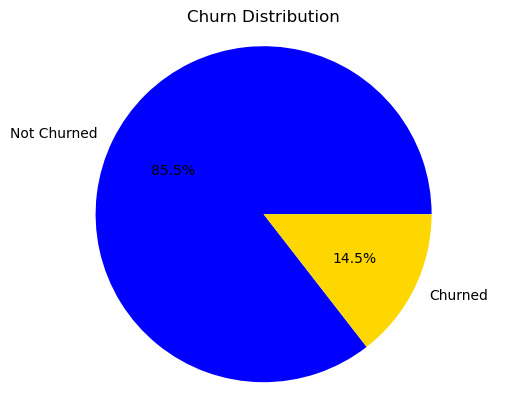

In [35]:
# Visualizing the churn distribution
# Create the pie chart
colors = ['blue', 'gold']
plt.title('Churn Distribution')
plt.pie(df['churn'].value_counts(),labels=['Not Churned','Churned'], autopct='%1.1f%%', colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

From the pie chart above exactly **85.5%** of the are Not Churned while **14.5%** fall under Churned 

<Axes: xlabel='total day charge', ylabel='Count'>

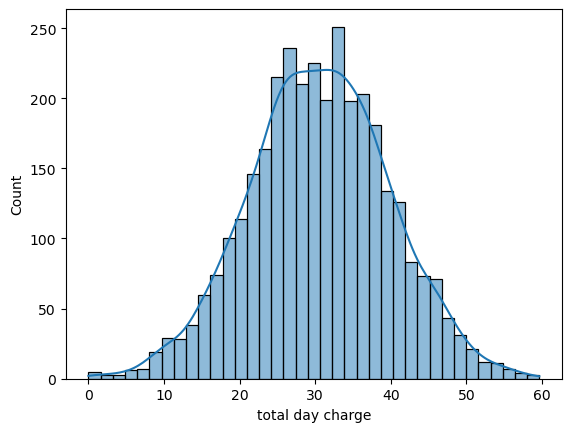

In [36]:
# Visualizing the total day charge distribution
sns.histplot(df['total day charge'], kde=True)

The analysis shows a normal distribution

<Axes: xlabel='total night charge', ylabel='Count'>

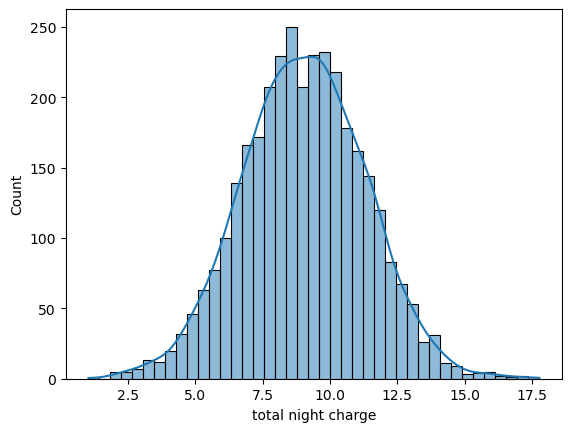

In [37]:
# Visualizing the total night charge distribution
sns.histplot(df['total night charge'], kde=True)

The analysis shows a normal distribution

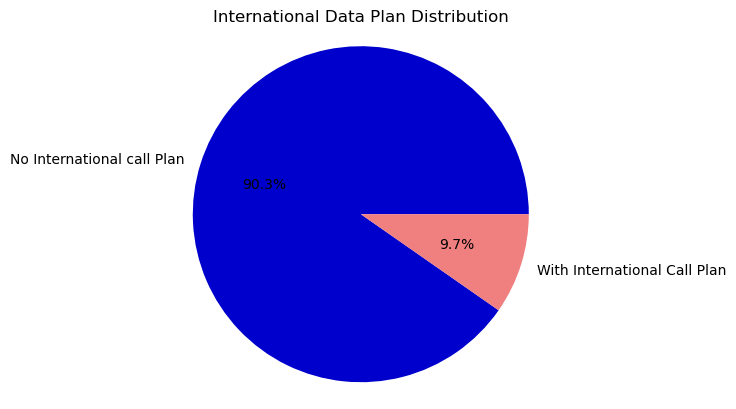

In [38]:
# Visualizing the data plan distribution
# Creating a pie chart
colors = ['mediumblue', 'lightcoral'] 
plt.title('International Data Plan Distribution')
plt.pie(df['international plan'].value_counts(),labels=['No International call Plan','With International Call Plan'], autopct='%1.1f%%', colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Showing the plot
plt.show()

90.3% of the customers have no International Data plan while 9.7% have a International data plan

## 4.2 Bi-variate Data Analysis

<Axes: xlabel='churn', ylabel='total day charge'>

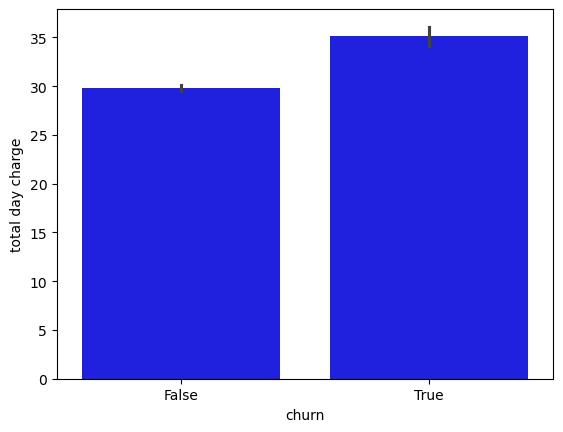

In [39]:
# Visualizing the total day charge distribution
sns.barplot(x='churn', y='total day charge', data=df, color='blue')

The above analysis show that majority of those who churn have higher total day charges

<Axes: xlabel='churn', ylabel='total night charge'>

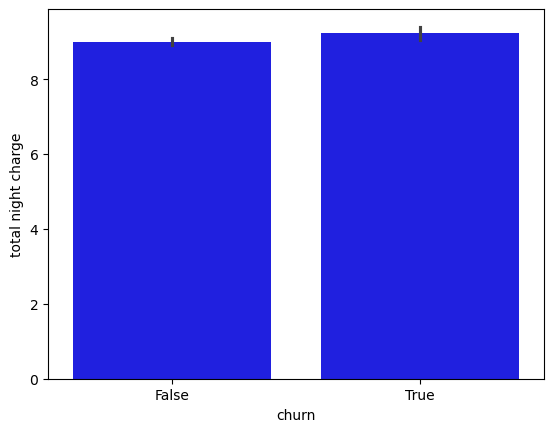

In [40]:
# Visualizing the total night charge distribution
sns.barplot(x='churn', y='total night charge', data=df, color='blue')

The above analysis show that the churn rate is almost similar for total night charges.

## 4.3 Multi-variate Analysis

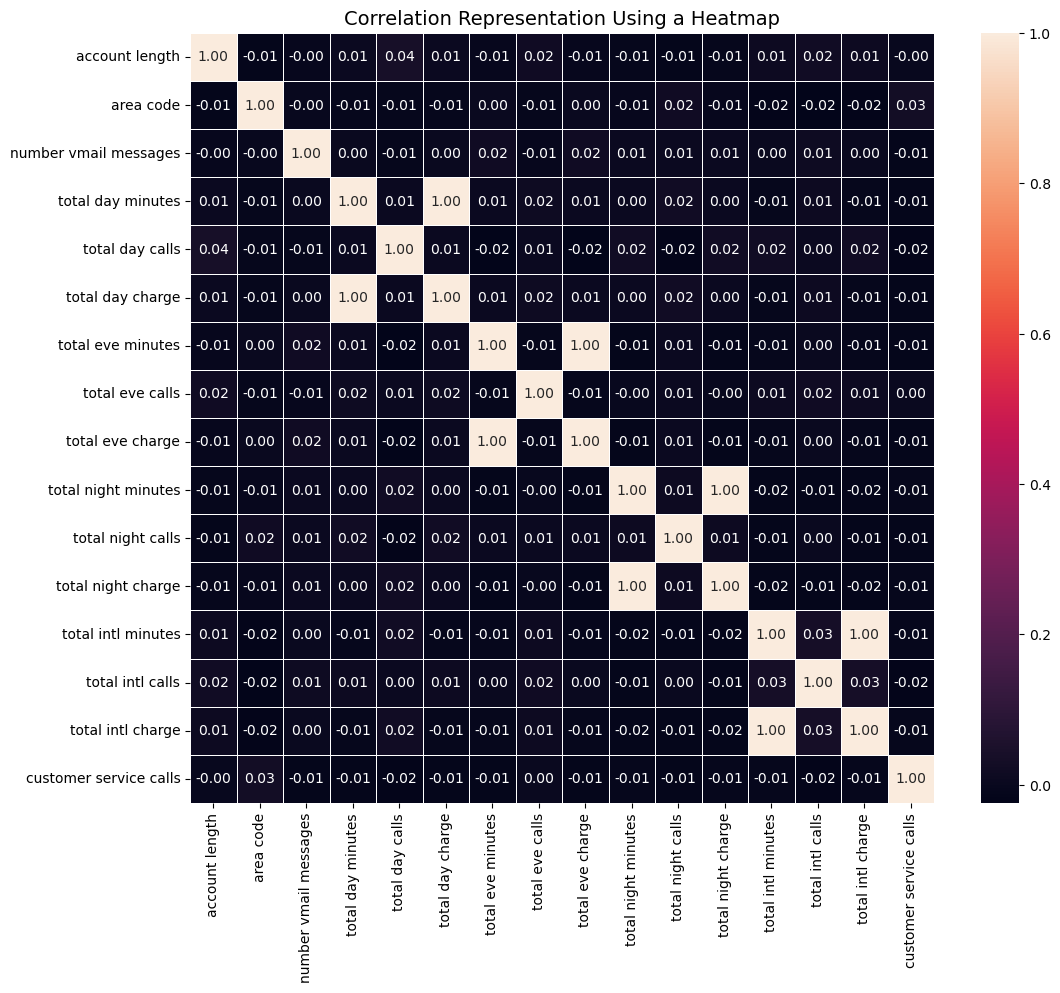

In [41]:
# Creating columns with only numeric data
df_num = df.select_dtypes(include='number')

# Showing corelation matrix
fig, ax = plt.subplots(figsize = (12, 10))
ax.set_title('Correlation Representation Using a Heatmap', fontsize=14)

corr = df_num.corr()
sns.heatmap(corr, annot = True,  fmt=".2f", linewidths=0.5)

fig.savefig('Correlation Representation Using a Heatmap.png')

There is little to no correlation among the quantitative variables

# 5. Data Preprocessing

## 5.1 Encoding

In [42]:
# Removing the phone number and state column
df1 = df.drop(['phone number', 'state'], axis=1)

# change categorical data into numerical data
df1['international plan'] = df1['international plan'].map({'no': 0, 'yes': 1})
df1['voice mail plan'] = df1['voice mail plan'].map({'no': 0, 'yes': 1})
df1['churn'] = df1['churn'].map({False : 0, True : 1})




## 5.2 Scaling the data

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df1[[column]])

# Iterate through numerical columns and scale them
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[[column]] = scaling(column)

df1.head()


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.524793,0.068627,0.0,1.0,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.068627,0.0,1.0,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.068627,0.0,0.0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,0.000000,1.0,0.0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,0.068627,1.0,0.0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0


In [44]:
# Creating a Test and Train Dataset
y = df1['churn']
X = df1.drop(['churn'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the split data
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (2333, 18)
Test set size: (1000, 18)


### 5.2.3 SMOTE

Due to the Class imbalance above, the use of SMOTE is necessary to balance the train and test data 

In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("\nValue counts of y_train_resampled:\n", y_train_resampled.value_counts())

Shape of X_train_resampled: (3986, 18)

Value counts of y_train_resampled:
 churn
0.0    1993
1.0    1993
Name: count, dtype: int64


# 6. Data Modelling